In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
import pickle
import os


In [2]:
from matplotlib import style
style.use('dark_background')

In [3]:
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')


## M33 results from model

In [4]:
#M33
# radius
arcmin_r = np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,76,78,80,82,84,86,88,90,92,94,96])

# sigma_los
kms_sigma = np.array([0.7, 9.5, 9.3, 9.6, 0.0, 0.1, 9.1, 8.2, 8.0, 8.4, 7.9, 8.0, 7.6, 7.6, 8.0, 8.9, 9.8, 0.2, 0.3, 0.5, 9.5, 8.8, 9.1, 9.0, 8.5, 8.2, 8.3, 7.6, 7.7, 6.8, 7.4, 7.5, 6.7, 6.6, 6.4, 8.0, 8.2, 6.5, 6.5, 7.4, 6.5, 5.6, 6.1, 5.7, 5.7, 5.6, 6.4, 7.5])

# Sigma_HI
#kms_SigHI = np.array([7.89, 7.73, 8.26, 8.52, 8.23, 7.66, 8.00, 8.61, 8.14, 8.19, 7.61, 7.57, 7.54, 6.50, 4.99, 3.50, 2.51, 1.75, 1.34, 1.00, 0.75, 0.67, 0.56, 0.63, 0.49, 0.36, 0.23, 0.18, 0.12, 0.08, 0.04, 0.03, 0.03, 0.00, 0.03, 0.07, 0.03, 0.04, 0.04, 0.04, 0.08, 0.09, nan, nan, 0.09, nan, nan, nan])

In [5]:
#converted data
mpc_gal_dist = 0.84 #from Beck et al 
fac = mpc_gal_dist*np.pi/(180*60)
mpc_radius = fac*arcmin_r
mpc = 1
kpc = 1e+3*mpc
kpcm = 3.086e+21
pcm = kpcm/1e+3
Msun = 1.989e+33
kpc_radius = kpc*mpc_radius
kms_dat_v = np.sqrt(3)*kms_sigma


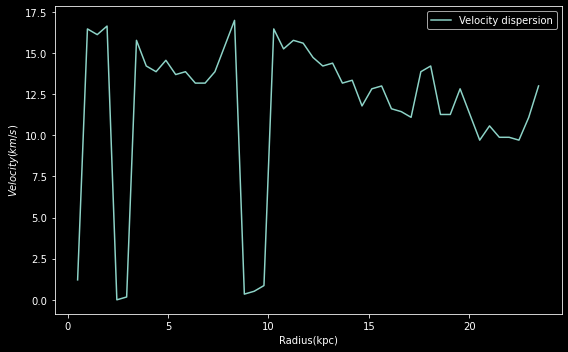

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8, 5), tight_layout=True)
ax.plot(kpc_radius, kms_dat_v, label = 'Velocity dispersion')
ax.set_xlabel('Radius(kpc)')
ax.set_ylabel('$Velocity(km/s)$')
ax.legend()
# ax.grid(b=True, which='major', color=[.6, .6, .6], linestyle='-')
# ax.grid(b=False, which='minor', color=[.6, .6, .6], linestyle=':')

In [7]:
#data from Chamandy et al (2016)
kpc_dat_r = np.array([2, 4])
dat_omega = np.array([40.7, 24.9])*1e+5/kpcm
dat_q = np.array([0.62, 0.84])
dat_sigma1 = np.array([11.3, 9.43])
dat_sigma2 = np.array([1.90, 1.28 ])
dat_sigma = (dat_sigma1 + dat_sigma2)*Msun/(pcm)**2
dat_sigmasfr = np.array([9.64, 3.99])*Msun/((10**9*365*24*60*60)*(pcm)**2)


In [8]:
final_vel = []
for i in range(1,5,2):
    idx = np.where((kpc_radius>i)*(kpc_radius<i+2))
    final_vel.append(np.take(kms_dat_v,idx).mean())
final_vel = np.array(final_vel)

In [9]:
import analytic_data as a
data_an = a.analytic_data(kms_dat_v, dat_sigma, dat_omega, dat_q, dat_sigmasfr, model_no =3, let = 'a')


Value of cs is 986868.443212531 and the max value of u is 1697409.7914174998
$M>>\sqrt(2)$
$tau^e>tau^r$. Therefore model changed to 3d


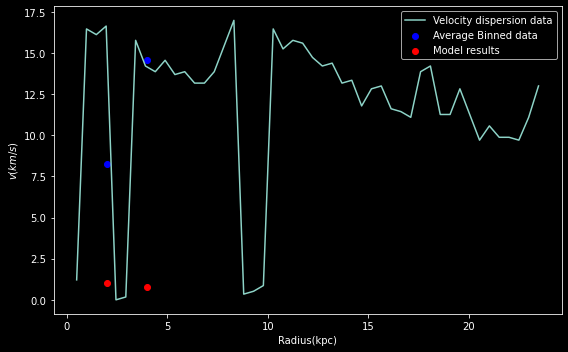

In [10]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8, 5), tight_layout=True)
ax.plot(kpc_radius, kms_dat_v, label = 'Velocity dispersion data')
ax.scatter(kpc_dat_r, final_vel, c = 'b', label = 'Average Binned data')
ax.scatter(kpc_dat_r, data_an,c = 'r', label = 'Model results')
ax.set_xlabel('Radius(kpc)')
ax.set_ylabel('$v(km/s)$')
ax.legend()